# Hands-on 04: Operações importantes com sinais 

# Objetivos
As metas desse tutorial são ajudar o usuário a:
- Fazer uma breve revisão sobre processos estocásticos e medidas relacionadas
- Fazer uma breve revisão sobre cálculo de potência e energia de um sinal (seu significado e seu cálculo)
- Fazer uma aplicação prática com a autocorrelção (remoção de eco com a autocorrelação).

# Prática 1: Cálculo da autocorrelação


Para calcular a autocorrelação de um sinal amostrado não será necessário integrações, pois no tempo discreto sua formulação depende de um somatório. Portanto usaremos a fórmula de autocorrelação discreta para calcular $R_{xx}(m)$. 


**Passo 01:** Abra um script no Spyder, salve-o como **handson4_1_1.py** e escreva o seguinte código:

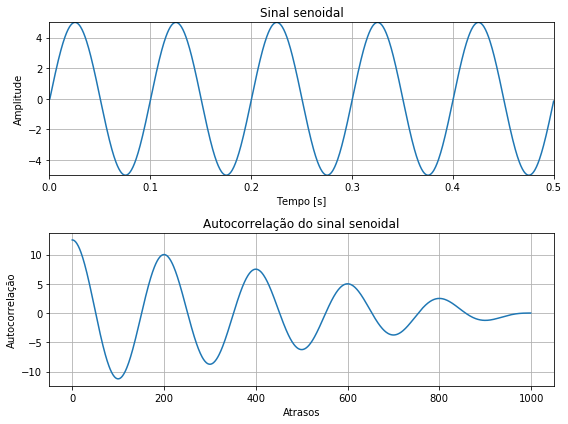

In [8]:
import numpy as np
from matplotlib import pyplot as plt
M =1000                                # Número de atrasos
N =1000                                # Número de amostras
f1=10                                  # Frequência do seno (kHz)
Fs=2000                                # Frequência de amostragem (kHz)
n =np.arange(0,N)                      # Vetor com índices de amostra
Am=5                                   # Determina a amplitude
x=Am*np.sin(2*np.pi*f1*n/Fs)           # Gera o sinal x(n)
t=np.arange(1,N+1)*(1/Fs)              # Definiçao do eixo do tempo
#implementaçao:
def xcorr(sinal):
    N = len(sinal)
    rxx = np.zeros([N],dtype = float)
    for m in range(N):
        for n in range(N-m):
            rxx[m] = rxx[m]+x[n]*x[n+m]
    rxx = rxx/N
    return rxx
Rxx = xcorr(x)
#Plotagem:
plt.figure(1,[8,6])
#Plota x[n]
plt.subplot(211)
plt.title("Sinal senoidal")
plt.ylabel("Amplitude")
plt.xlabel("Tempo [s]")
plt.grid()
plt.axis([0,0.5,-5,5])
plt.plot(t,x)
#Plota Autocorrelação
plt.subplot(212)
plt.plot(Rxx)
plt.xlabel("Atrasos")
plt.ylabel("Autocorrelação")
plt.title("Autocorrelação do sinal senoidal")
plt.grid()

plt.tight_layout()
plt.show()

**Passo 2:** Sabemos que a potência média é o valor de $R_{xx}(0)$. Assim, vamos inspecionar o gráfico de autocorrelação e verifique a potência média do sinal. Digite no _Console IPython_ o seguinte comando:

In [9]:
Rxx[0]

12.499999999999996

Note que sse valor é exatamente $\frac{Am^2}{2} = \frac{5^2}{2} =$ 12,5.

# Prática 2: Função do Python para o cálculo da autocorrelação

A função obtida na prática 1 mostra a autocorrelação do sinal $x(t)$ para valores de $m$ positivos. No Python, a função **numpy.correlate($\cdot$)** produz uma estimativa da correlação entre duas sequências aleatórias ou a própria autocorrelação. Note que a numpy.correlate() encontra a autocorrelação quando as duas sequências passadas como parâmetros são as mesmas, como será mostrado em seguida. 

**Passo 01:** Abra um script no Matlab, salve-o como **handson4_2_1.py** e escreva o seguinte código:

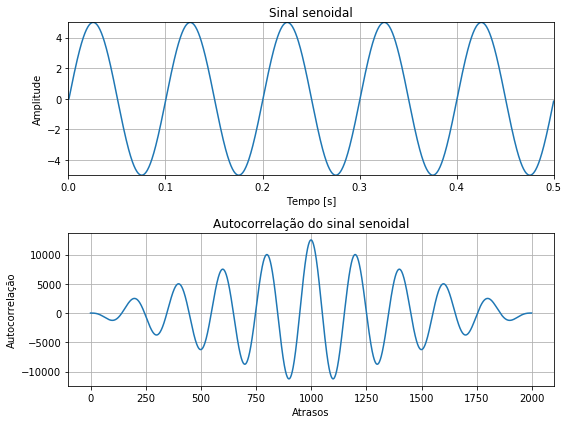

In [10]:
import numpy as np
from matplotlib import pyplot as plt
M =1000                                # Número de atrasos
N =1000                                # Número de amostras
f1=10                                  # Frequência do seno (kHz)
Fs=2000                                # Frequência de amostragem (kHz)
n =np.arange(0,N)                      # Vetor com índices de amostra
Am=5                                   # Determina a amplitude
x=Am*np.sin(2*np.pi*f1*n/Fs)           # Gera o sinal x(n)
t=np.arange(1,N+1)*(1/Fs)              # Definiçao do eixo do tempo

Rxx = np.correlate(x,x,'full')
#Plotagem:
plt.figure(1,[8,6])
#Plota x[n]
plt.subplot(211)
plt.title("Sinal senoidal")
plt.ylabel("Amplitude")
plt.xlabel("Tempo [s]")
plt.grid()
plt.axis([0,0.5,-5,5])
plt.plot(t,x)
#Plota Autocorrelação
plt.subplot(212)
plt.plot(Rxx)
plt.xlabel("Atrasos")
plt.ylabel("Autocorrelação")
plt.title("Autocorrelação do sinal senoidal")
plt.grid()

plt.tight_layout()
plt.show()

Note que a função aucorrelação obtida na prática 2 mostra a autocorrelação do sinal $x(t)$  centrada no zero. Assim, a função **np.correlate** retorna o dobro do número de amostras do sinal $x(n)$. Como esperado, o gráfico acima estima a autocorrelação com $N$=1000 amostras, dessa forma se assemelhando ao gráfico do código feito usando a função implementada (prática 1).